## Customer Churn Prediction
Churn prediction is common use case in machine learning domain. Churn means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.

### Data Set - IBM Telco Churn
Contains information from a fictional telco company has provided home phone and Internet services to 7043 customers in California in Q3.
<br> Source : https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 

In [1]:
#fetch the datset
#!unzip /content/drive/MyDrive/Dataset/Telco-Customer-Churn.zip

###Setting Environment

In [2]:
#imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler #StandardScaler

from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import RFE, chi2
from sklearn.svm import SVC

#settings
warnings.filterwarnings("ignore")
%xmode Verbose
#%pdb on

Exception reporting mode: Verbose


### EDA

#### Load, explore & clean the data

In [3]:
DATA_PATH = "/content/drive/MyDrive/Dataset/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
df.shape

(7043, 21)

There are 7043 entries and 21 columns (variables). 

In [4]:
#see contents
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 20 features (independent variables) and 1 target (dependent variable) for 7043 customers.

Target variable indicates if a customer has has left the company (i.e. churn=yes) or not within the last month. 

Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

In [6]:
#check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check duplicates
df[df.duplicated()].sum(axis=1)

Series([], dtype: float64)

There are no missing or duplicate values. <br>

Since default data types of the variables is incorrect. Let's set it to appropriate types by referring to data dictionary provided along with source.

1.   customerID : contains alpha-numeric characters, object is suitable.
2.   gender : Two values - Male and Female. Categorical (Nominal) - boolean.
3.   SeniorCitizen : Two values - Yes(1) and No(0) - Boolean.
4.   Partner : Two values - Yes(1) and No(0) - Boolean.
5.   Dependents : Two values - Yes(1) and No(0) - Boolean.  
6.   Tenure :  Number of months of service - Integer.
7.   PhoneService : Two values - Yes(1) and No(0) - Boolean.
8.   MultipleLines : Three values - No phone service, Yes and No - Category (Nominal).
9.   InternetService : No, DSL, Fiber Optic, Cable - Category (Nominal)  
10.  OnlineSecurity : Two values - Yes(1) and No(0) - Boolean.     
11.  OnlineBackup : Two values - Yes(1) and No(0) - Boolean.     
12.  DeviceProtection : Two values - Yes(1) and No(0) - Boolean.  
13.  TechSupport : Two values - Yes(1) and No(0) - Boolean.      
14.  StreamingTV : Two values - Yes(1) and No(0) - Boolean.     
15.  StreamingMovies : Two values - Yes(1) and No(0) - Boolean.
16.  Contract : Month-to-Month, One Year, Two Year - Category (Nominal).          
17.  PaperlessBilling : Two values - Yes(1) and No(0) - Boolean.
18.  PaymentMethod : Bank Withdrawal, Credit Card, Mailed Check - Category (Nominal).
19.  MonthlyCharges : Amount - Float.   
20.  TotalCharges : Amount - Float.
21.  Churn : Two values - Yes(1) and No(0) - Boolean.

##### Target Variable

In [8]:
#check for invalid values
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#convert to boolean datatype
bool_dict = {"Yes" :True, "No":False}
df["Churn"] = df["Churn"].replace(bool_dict)
df.Churn.dtype

dtype('bool')

In [10]:
#check distribution of target
df["Churn"].value_counts()

False    5174
True     1869
Name: Churn, dtype: int64

Approx 25% customers are likely to churn while 75% continue with the service distribution is uneven, sampling is required (performed later).

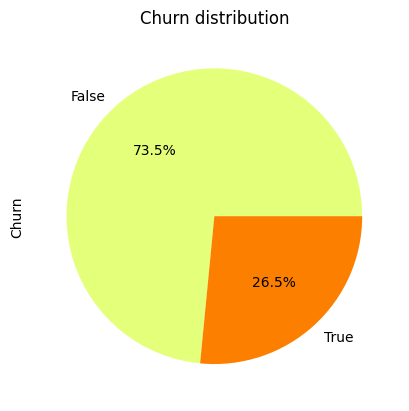

In [11]:
df.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%', title="Churn distribution", colormap='Wistia')
plt.show()

####Features 

Customer ID is unique key identifier, so it is irrevelant, we will figure out impact of other features.

In [12]:
#customerID is not helpful in Analysis
df.drop(['customerID'], axis=1, inplace=True)

In [13]:
#shape of every feature to verify invalid data
for col in df.columns:
  print(df[col].name, df[col].value_counts().shape )

gender (2,)
SeniorCitizen (2,)
Partner (2,)
Dependents (2,)
tenure (73,)
PhoneService (2,)
MultipleLines (3,)
InternetService (3,)
OnlineSecurity (3,)
OnlineBackup (3,)
DeviceProtection (3,)
TechSupport (3,)
StreamingTV (3,)
StreamingMovies (3,)
Contract (3,)
PaperlessBilling (2,)
PaymentMethod (4,)
MonthlyCharges (1585,)
TotalCharges (6531,)
Churn (2,)


##### Binary Features
We have 6 Binary Features - Gender, Senior Citizen, Dependents, Partner, Phone Service, Paperless Billng.

In [14]:
#converting binary variables to boolean data type

#mapping gender female(True:1) - male(False:0)
df.gender.replace({"Male":False,"Female":True}, inplace= True)

#mapping senior citizen (True:1) - (False:0)
df.SeniorCitizen.replace({0:False,1:True}, inplace= True)

#mapping other binary variables (yes:1) - (no:0)
df.Dependents.replace({"No":False,"Yes":True}, inplace= True)
df.PhoneService.replace({"No":False,"Yes":True}, inplace= True)
df.PaperlessBilling.replace({"No":False,"Yes":True}, inplace= True)
df.Partner.replace({"No":False,"Yes":True}, inplace= True)

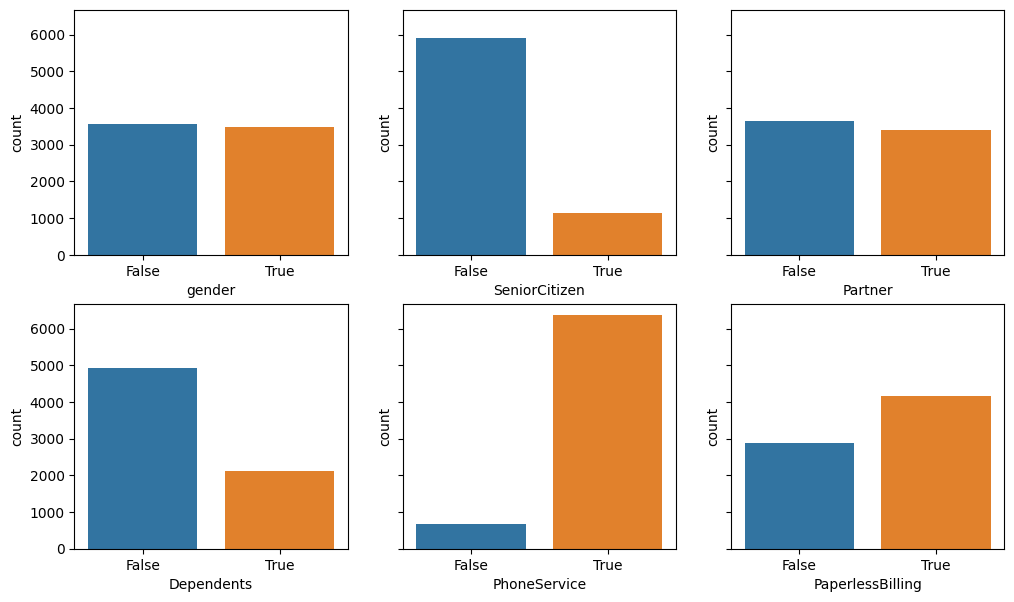

In [15]:
#check the distribution of binary variables
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
bi_var = set()
i,j = 0,0
for col in df.columns:
  if df[col].value_counts().shape[0]==2 and df[col].name != 'Churn':
    if j > 2 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    sns.countplot(data=df, x=df[col].name,  ax=axes[i, j])
    bi_var.add(df[col].name)
    j = j + 1

From the graphs, we observe that there is
High data imbalance in SeniorCitizen and PhoneService features

i.e. there are very few customers without PhoneService, many customers have phone services.

and there are few customers who are SeniorCitizen (above 65), more number of young customers in the data.


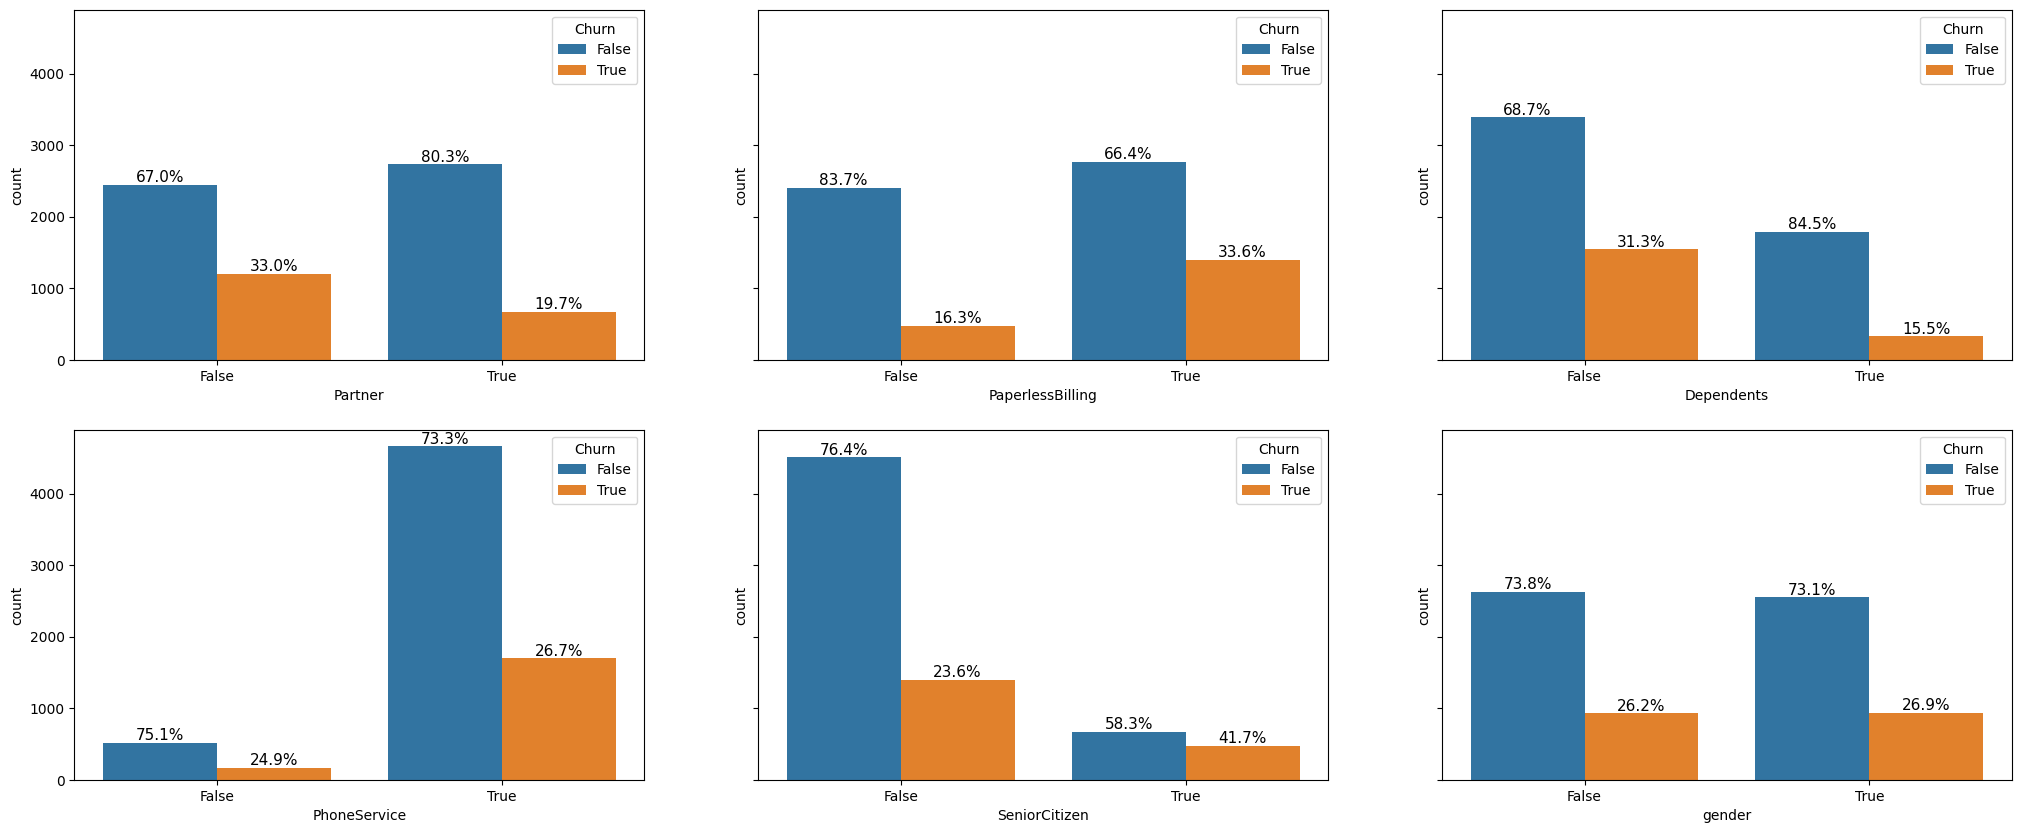

In [16]:
#function to add percentage above bar plot
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

#analysing distribution wrt Churn
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)
i,j=0,0
for col in bi_var:
    if j > 2 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    ax = sns.countplot(data=df, x=df[col].name,  ax=axes[i, j], hue='Churn')
    percentage_above_bar_relative_to_xgroup(ax)
    bi_var.add(df[col].name)
    j = j + 1


For every feature, there are less numerber of customers who are likely to Churn wrt those who are likely to continue the service. However, it is important to identify the reason of the churn since customer rentention is very important for growth of the company.
<br>

Also, we can observe that effect of gender on Churn is similar for both female and male, we can ignore this variable in our further analysis.
Other observations: 
1. Those with Paperless Billing are more likely to Churn compared to Paper Billing.
2. Senior Citizens are more likely to Churn. 
3. Customers without Dependents are more likely to Churn. 
4. Customers without Partners are more likely to Churn.

In [17]:
#check for effect of binary variables on target var - CHURN

for feature in bi_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby([feature]).mean()
  print(mean)

            Churn
Partner          
False    0.329580
True     0.196649
                     Churn
PaperlessBilling          
False             0.163301
True              0.335651
               Churn
Dependents          
False       0.312791
True        0.154502
                 Churn
PhoneService          
False         0.249267
True          0.267096
                  Churn
SeniorCitizen          
False          0.236062
True           0.416813
           Churn
gender          
False   0.261603
True    0.269209


From above data, again we realize that there is no significant impact of gender on churn since the effect is nearly equal.

In [18]:
#method 2 to calculate the mean of various features
#pd.pivot_table(df, values='Churn', index=['gender'], columns=["Dependents", "Partner"], aggfunc=np.mean)

#####Multivariate features
<br>
1. Following features are trivariate : <br>
MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract. <br>
2. PaymentMethod is quadra-variate.

For Payment feature, the labels are too wordy, so we refine the words for better understanding. [removing (Automatic) from the values.]

In [19]:
print( "Initial =>>" , df.PaymentMethod.unique())
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
print( "Updated =>>" , df.PaymentMethod.unique())

Initial =>> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Updated =>> ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


Now, let's set data type of these multivariate variables to category and check their distribution.

In [20]:
#changing data type to "Category"
mul_var = set()
for col in df.columns:
  if df[col].value_counts().shape[0] in [3,4] :
    mul_var.add(df[col].name)
    df[col] = df[col].astype('category')
    #print(col, df[col].dtype)

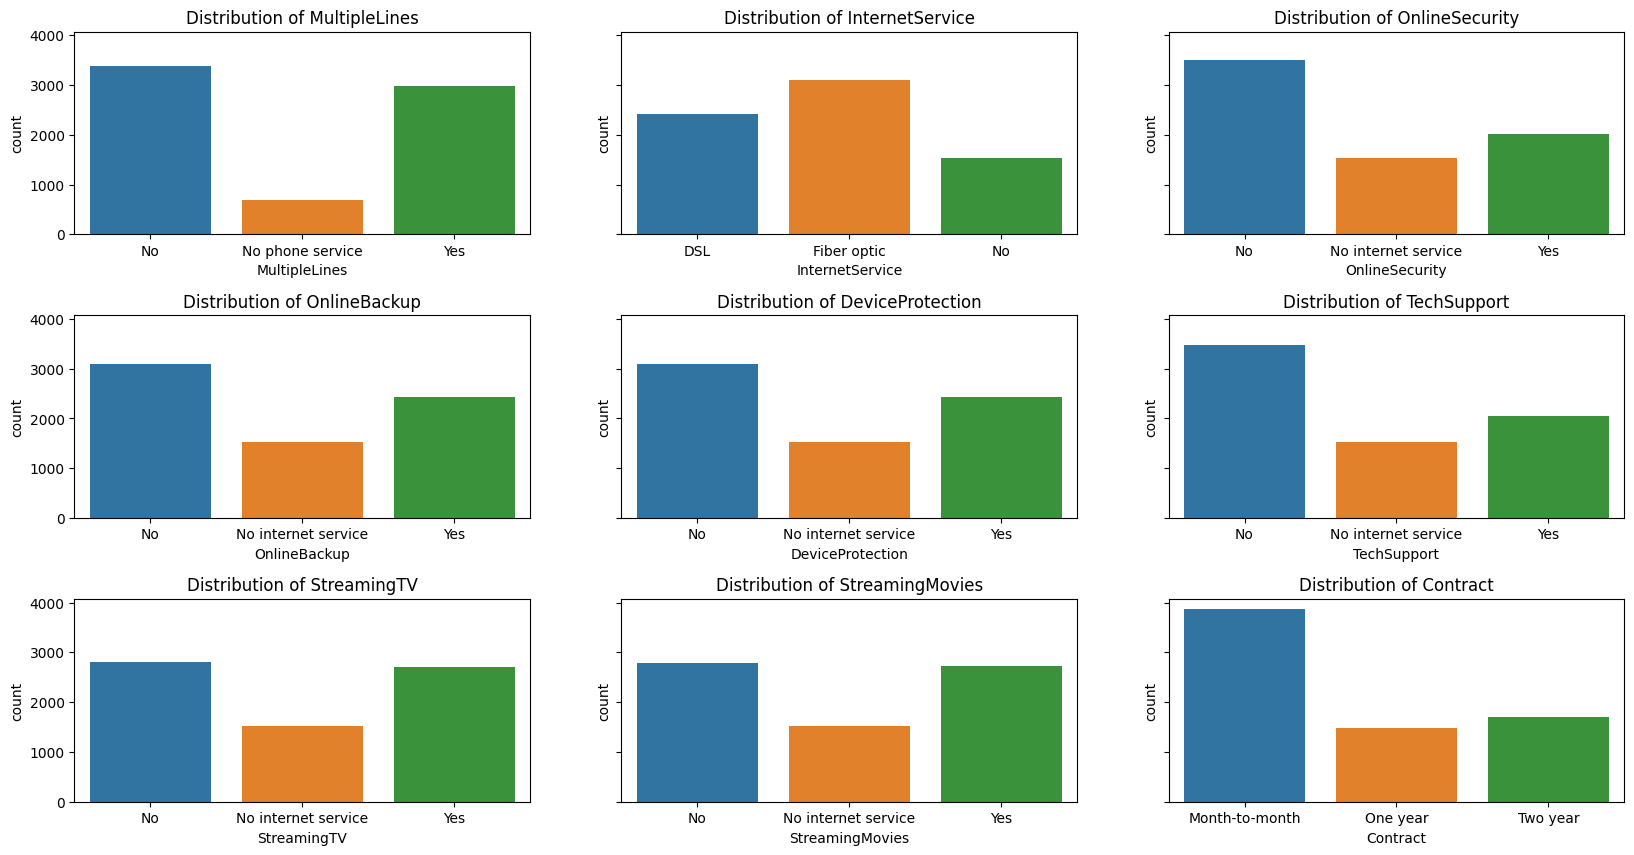

In [21]:
#check the distribution of multivariate variables = 3
fig, axes = plt.subplots(3, 3, figsize=(20,10), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
i,j = 0,0
for col in df.columns:
  if df[col].value_counts().shape[0] in [3] :
    if j > 2 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    ax= sns.countplot(data=df, x= df[col].name,  ax=axes[i, j])
    ax.set_title("Distribution of "+ str(col))
    j = j + 1

From above visualization, we can conclude the following : 
1. Nearly same number of customers prefer multiple lines as compared to those who don't. However, those who don't are slightly greater in number.
2. More customers with internet services prefer Fiber Optics over DSL.
3. More customers with internet services does not subscribe to additional online security service.
4. More customers with internet services do not prefer Online Backup.
5. More customers with internet service do not prefer to device protection.
6. More customers with internet service are not likely to use tech support.
7. Nearly equal number of customers with internet service prefer/ do not prefer Streaming TV and Streaming Movies.
9. Large number of customers prefer month-to-month contracts.


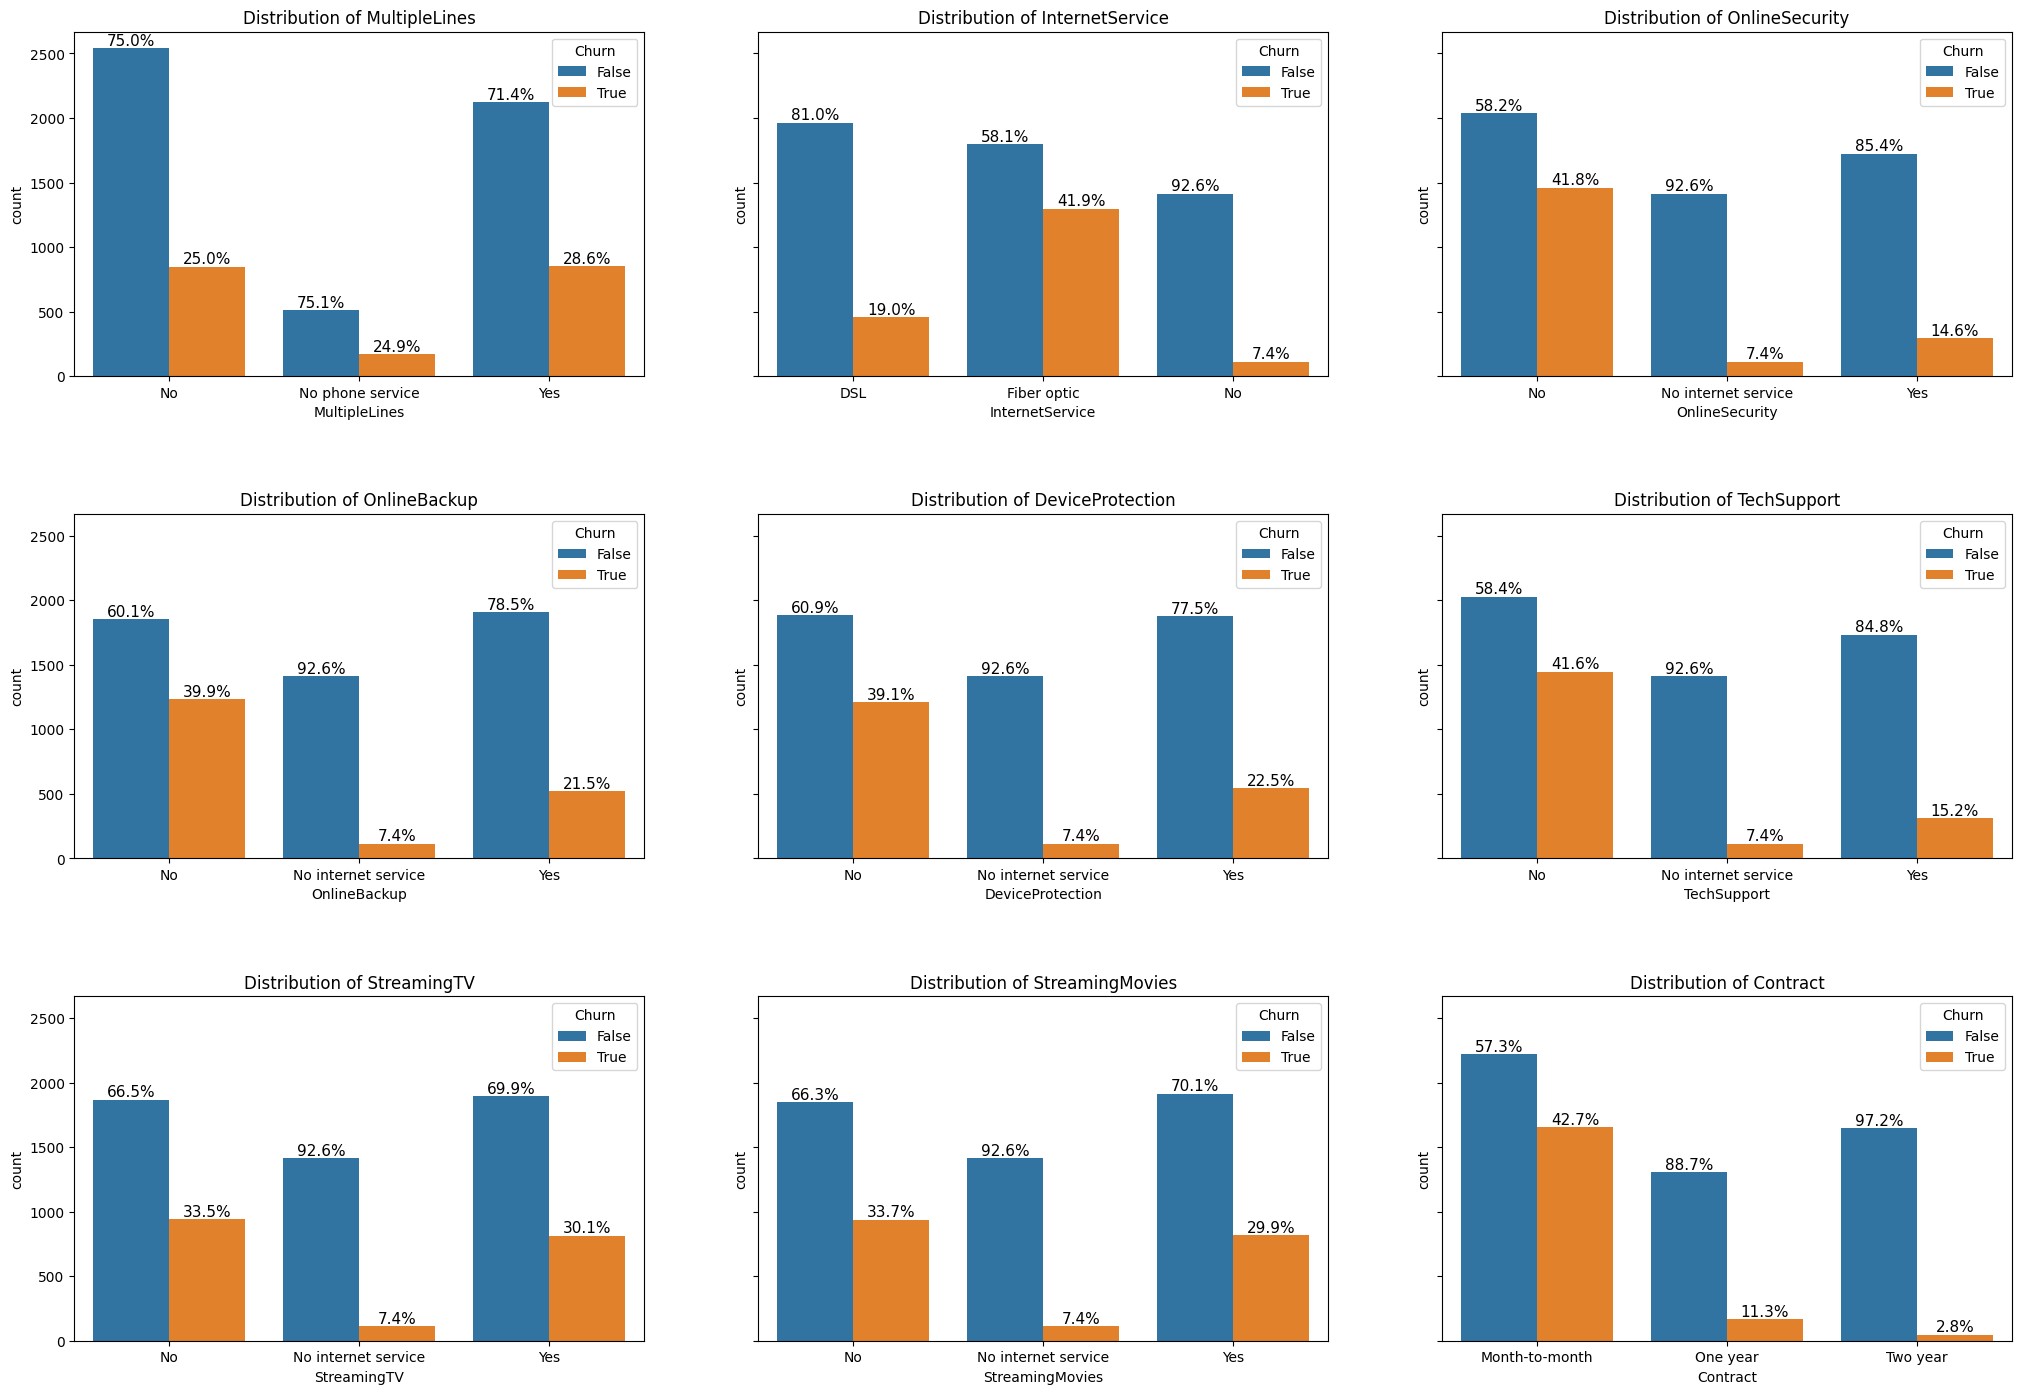

In [22]:
#check distribution with respect to target variable - Churn
fig, axes = plt.subplots(3, 3, figsize=(25,17), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
i,j = 0,0
for col in df.columns:
  if df[col].value_counts().shape[0] in [3] :
    if j > 2 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    ax = sns.countplot(data=df, x= df[col].name,  ax=axes[i, j],  hue='Churn')
    ax.set_title("Distribution of "+ str(col))
    percentage_above_bar_relative_to_xgroup(ax)
    j = j + 1

From above visualization, we can observe that
1. About 25% of customers with/without multiple lines are likely to churn.
2. Few customers using DSL are likely to churn compared to Fiber optics.
3. About 40% of customers who did not use Tech Support are like to churn while only 15% of those who did are likely to Churn.
4. For Online backup and Device Protection, around 40% of those who did not subscribe to these services are likely to churn while only 22% of those who subscribed are likely to churn. 
5. Similary for Streaming Tv and Movies services, around 34% of those who did not subscribe to these services are likely to churn while approximately 30% of those who subscribed are likely to churn. 
6. About 42% of month-to-month contract customers are likely to churn. The least percentage is for Two Year contract (2.8%) followed by One year contract (88.7%).

Text(0.5, 1.0, 'Distribution of PaymentMethod Categories')

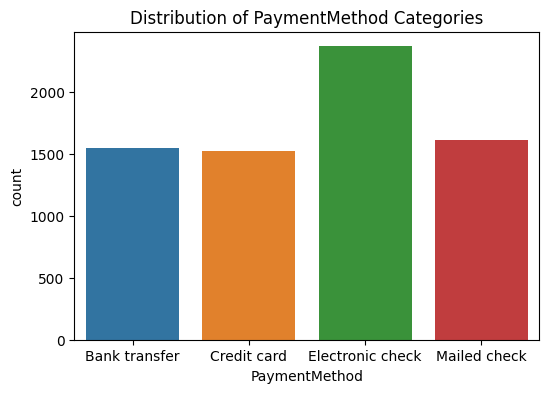

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x= df['PaymentMethod']).set_title("Distribution of PaymentMethod Categories")

The most preferred payment option is of Electronic Check. While other 3 options have approximately same preference.

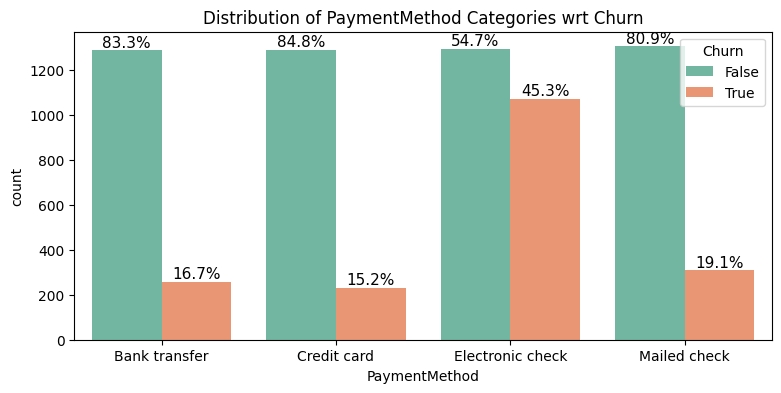

In [24]:
plt.figure(figsize=(9,4))
ax=sns.countplot(data=df, x= df['PaymentMethod'], hue='Churn', palette="Set2")
ax.set_title("Distribution of PaymentMethod Categories wrt Churn")
percentage_above_bar_relative_to_xgroup(ax)

The percentage of customers who churn vs who don't is greater for electronice check as compared to other payment mode.

In [25]:
for feature in mul_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby([feature]).mean()
  print(mean)

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                   Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.15

Multiple Lines feature do not have significant importance, as percentage of churn for all classes is nearly equal.

Customers with 'Electronic Check Payment' are more likely to churn.

Customers with 'Fiber Optics' are more likely to churn.

Customers with 'No Streaming Movies' are more likely to churn.

Customers with 'No Online Security' are more likely to churn.

Customers with 'No Tech Support' are more likely to churn.

Customers with 'Monthly contract' are more likely to churn.

Customers with 'No Device protection' are more likely to churn.

Customers with 'No Online Back Up' are more likely to churn.

Same can be confirmed with the following visualization.


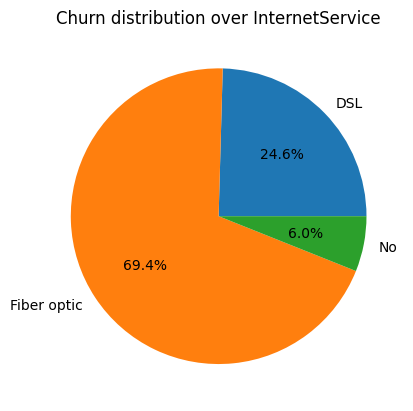

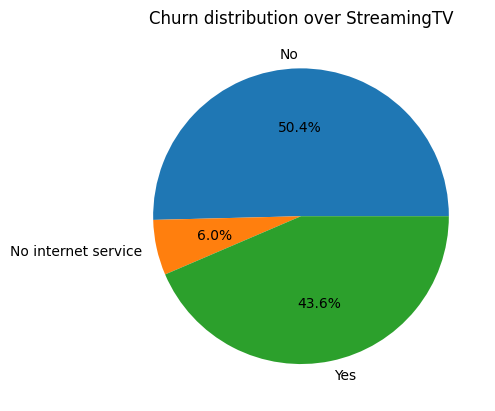

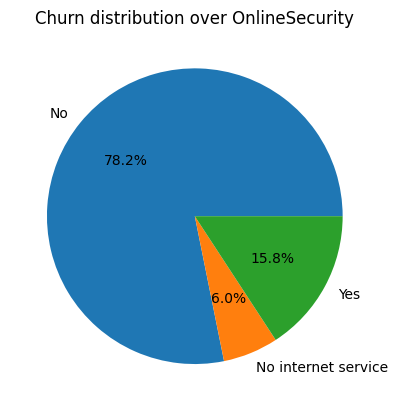

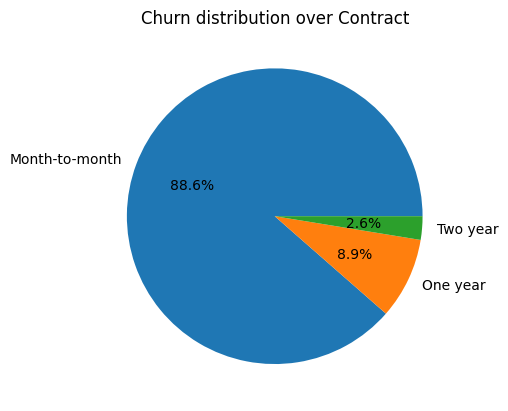

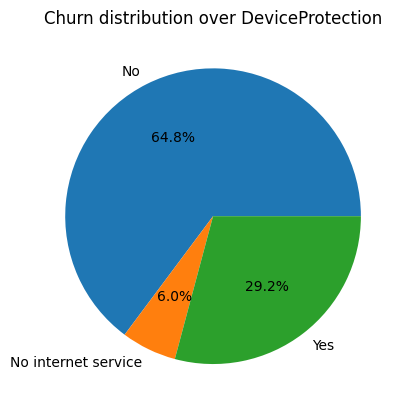

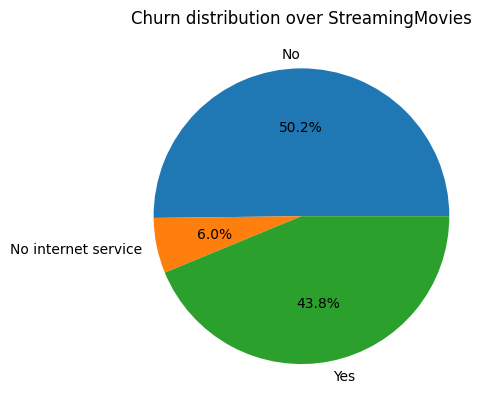

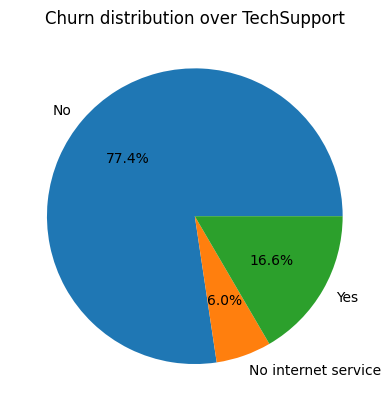

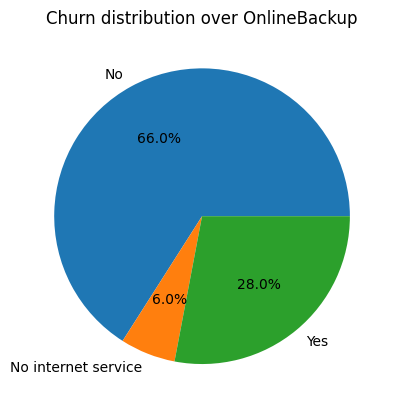

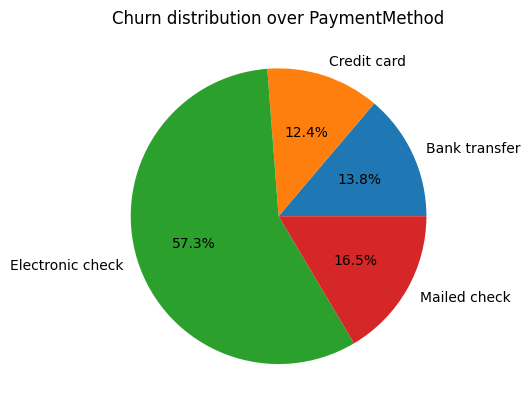

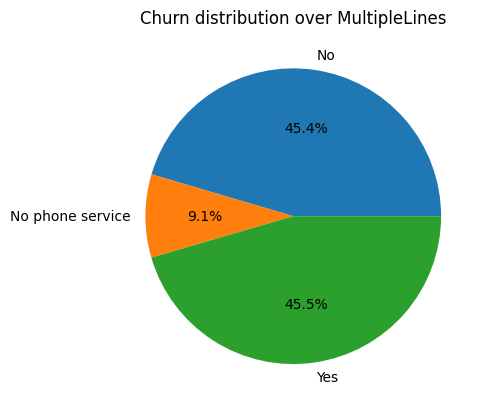

In [37]:
#visualization of proportion of Churn for each variable category
for col in mul_var : 
  count_df = pd.pivot_table(df, index=[col], columns=['Churn'], aggfunc='size')
  #print(count_df.iloc[:, 1])
  count_df.iloc[:, 1].plot(kind='pie', title="Churn distribution over "+str(col), ylabel="", autopct='%1.1f%%')
  plt.show()

#####Continuous Features
There are 3 features : "MonthlyCharges",  "tenure", "TotalCharges" that are continuous-numeric values.


Handling data types.
<br> Monthly charges (float) and tenure(int) seems appropriate. 
<br> But Total Charges is object, instead of float by default.
<br> This indicates presence of some invalid value in that column. 

In [38]:
#While changing type to float, we observe the presence of '' as a value.
#df['TotalCharges'] = df['TotalCharges'].astype('float')

#check for white spaces
df['TotalCharges'] = df['TotalCharges'].str.strip()
print("Shape : ",df[df['TotalCharges']==''].shape)
df[df['TotalCharges']=='']

Shape :  (11, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,True,False,True,True,0,False,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,True,Bank transfer,52.55,,False
753,False,False,False,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,,False
936,True,False,True,True,0,True,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,,False
1082,False,False,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,,False
1340,True,False,True,True,0,False,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,False,Credit card,56.05,,False
3331,False,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,,False
3826,False,False,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,,False
4380,True,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,,False
5218,False,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,,False
6670,True,False,True,True,0,True,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,,False


There are 11 instances with missing total charges. On further analysis, we can see that all of them are instances of no churn  and only exists when tenure is 0. These must be instances of new customers who have recently joined the service. So the most appropriate way to handle this to set these values to 0 (monthly charges x tenure).

In [39]:
#replacing invalid values with 0 
df['TotalCharges'].replace({'':0}, inplace= True)
#df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0.0)

#changing data type to float
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [40]:
#Total charges = Monthly Charge x Tenure 
df[df['TotalCharges']  != df['tenure']  * df['MonthlyCharges'] ]['Churn'].count()


6418

Total charges also contains additional cost along with MonthlyxTenure cost. This cost is added whiel availing additional services. 

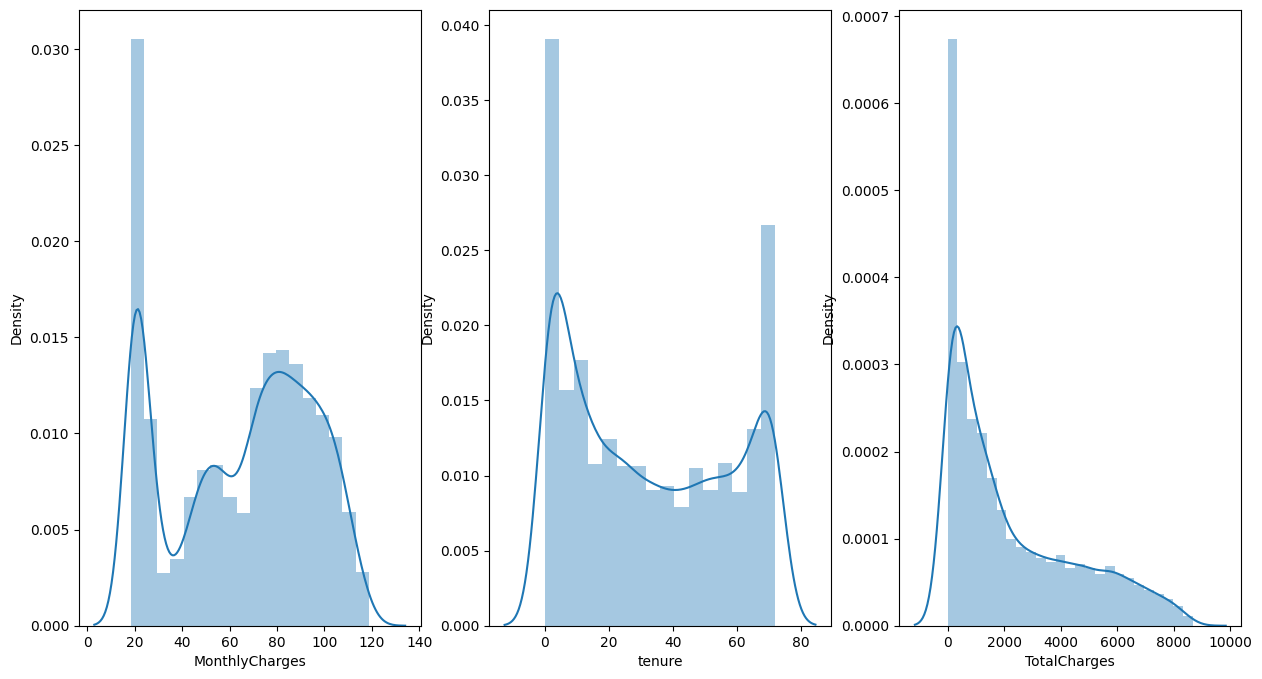

In [41]:
conti_var = ["MonthlyCharges",  "tenure", "TotalCharges"]

fig, axes = plt.subplots(1,3, figsize=(15, 8))
i=0
for var in conti_var :
  sns.distplot(df[var], ax=axes[i])
  i = i+1

* Large number of customers have monthly charges under 30. There are few in range of 40-80 compared to those who pay more than 80 monthly. 
* Similarly, we have two peaks for tenure. The largest one around 5 months and second peak around 70 months.  
* For total charges we have highest density for less than 250 amount. 

<br>
This visualization contains both Churn and Non-churn data. Let's observe the distribution for the customers who has actually churned.


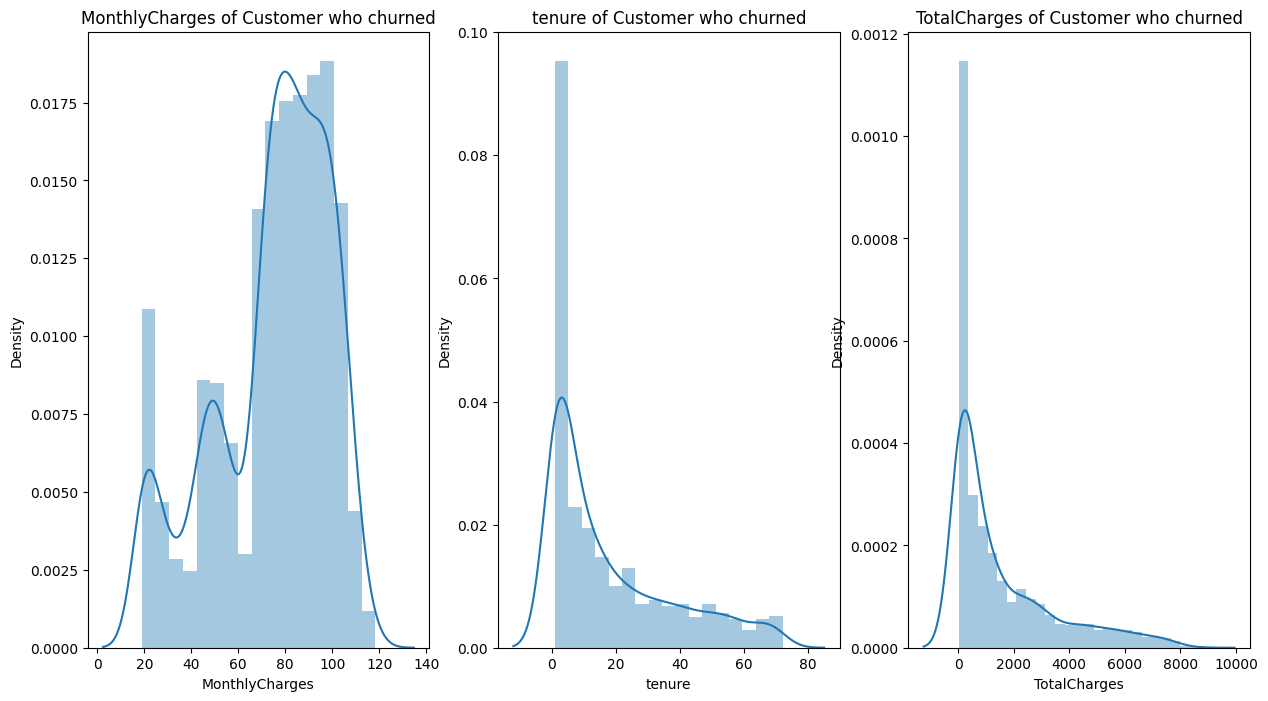

In [42]:
conti_var = ["MonthlyCharges",  "tenure", "TotalCharges"]
fig, axes = plt.subplots(1,3, figsize=(15, 8))
i=0
df_churn = df[df['Churn']==True][conti_var]
df_notchurn = df[df['Churn']==False][conti_var]

for var in conti_var :
  sns.distplot(df_churn[var], ax=axes[i]).set_title(var + " of Customer who churned")
  i = i+1

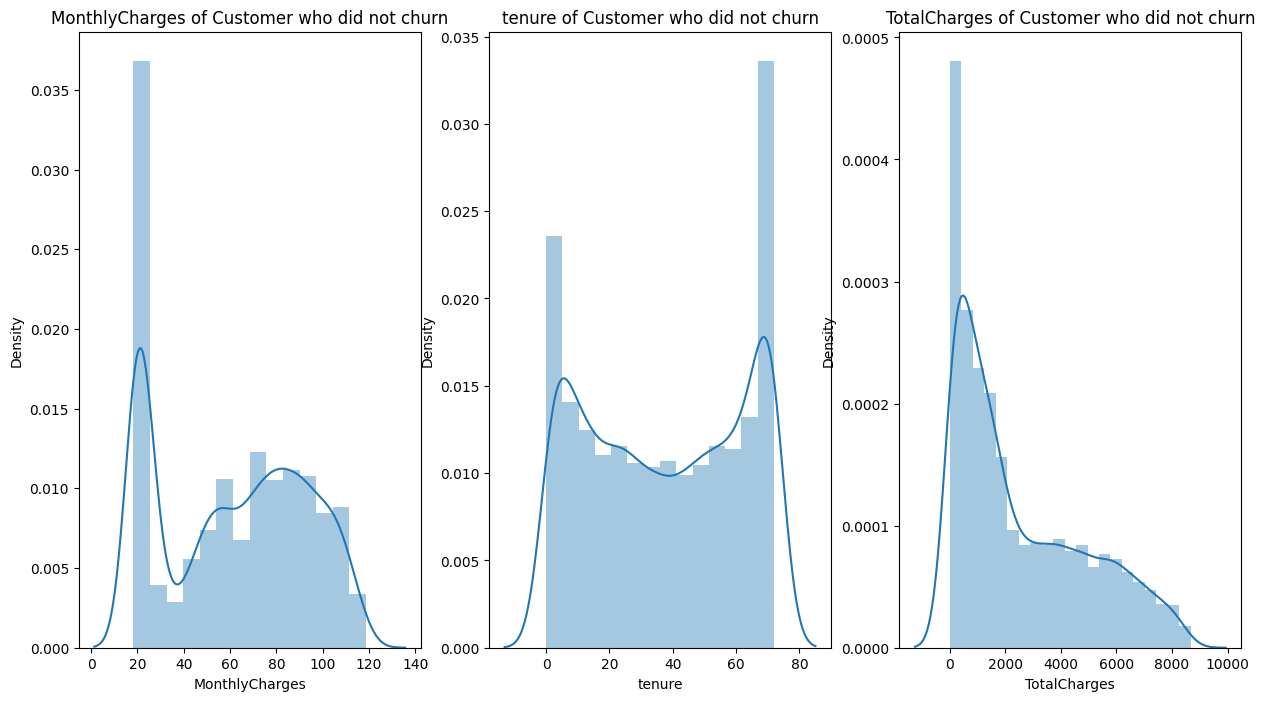

In [45]:
fig, axes = plt.subplots(1,3, figsize=(15, 8))
i=0
for var in conti_var :
  sns.distplot(df_notchurn[var], ax=axes[i]).set_title(var + " of Customer who did not churn")
  i = i+1
plt.show()

In [44]:
for feature in conti_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby(['Churn']).mean()
  print(mean)

#mean = df[["MonthlyCharges","tenure",'Churn']].groupby(['Churn']).mean()

       MonthlyCharges
Churn                
False       61.265124
True        74.441332
          tenure
Churn           
False  37.569965
True   17.979133
       TotalCharges
Churn              
False   2549.911442
True    1531.796094


From above observation & visualizaton, we csn conclude that Customers who are likely to leave (churn = 1) compared to churn = 0:

those with higher monthly charges 

those with lesser tenure (new customers)

those with lower total charges

##### Pair Plot between Features


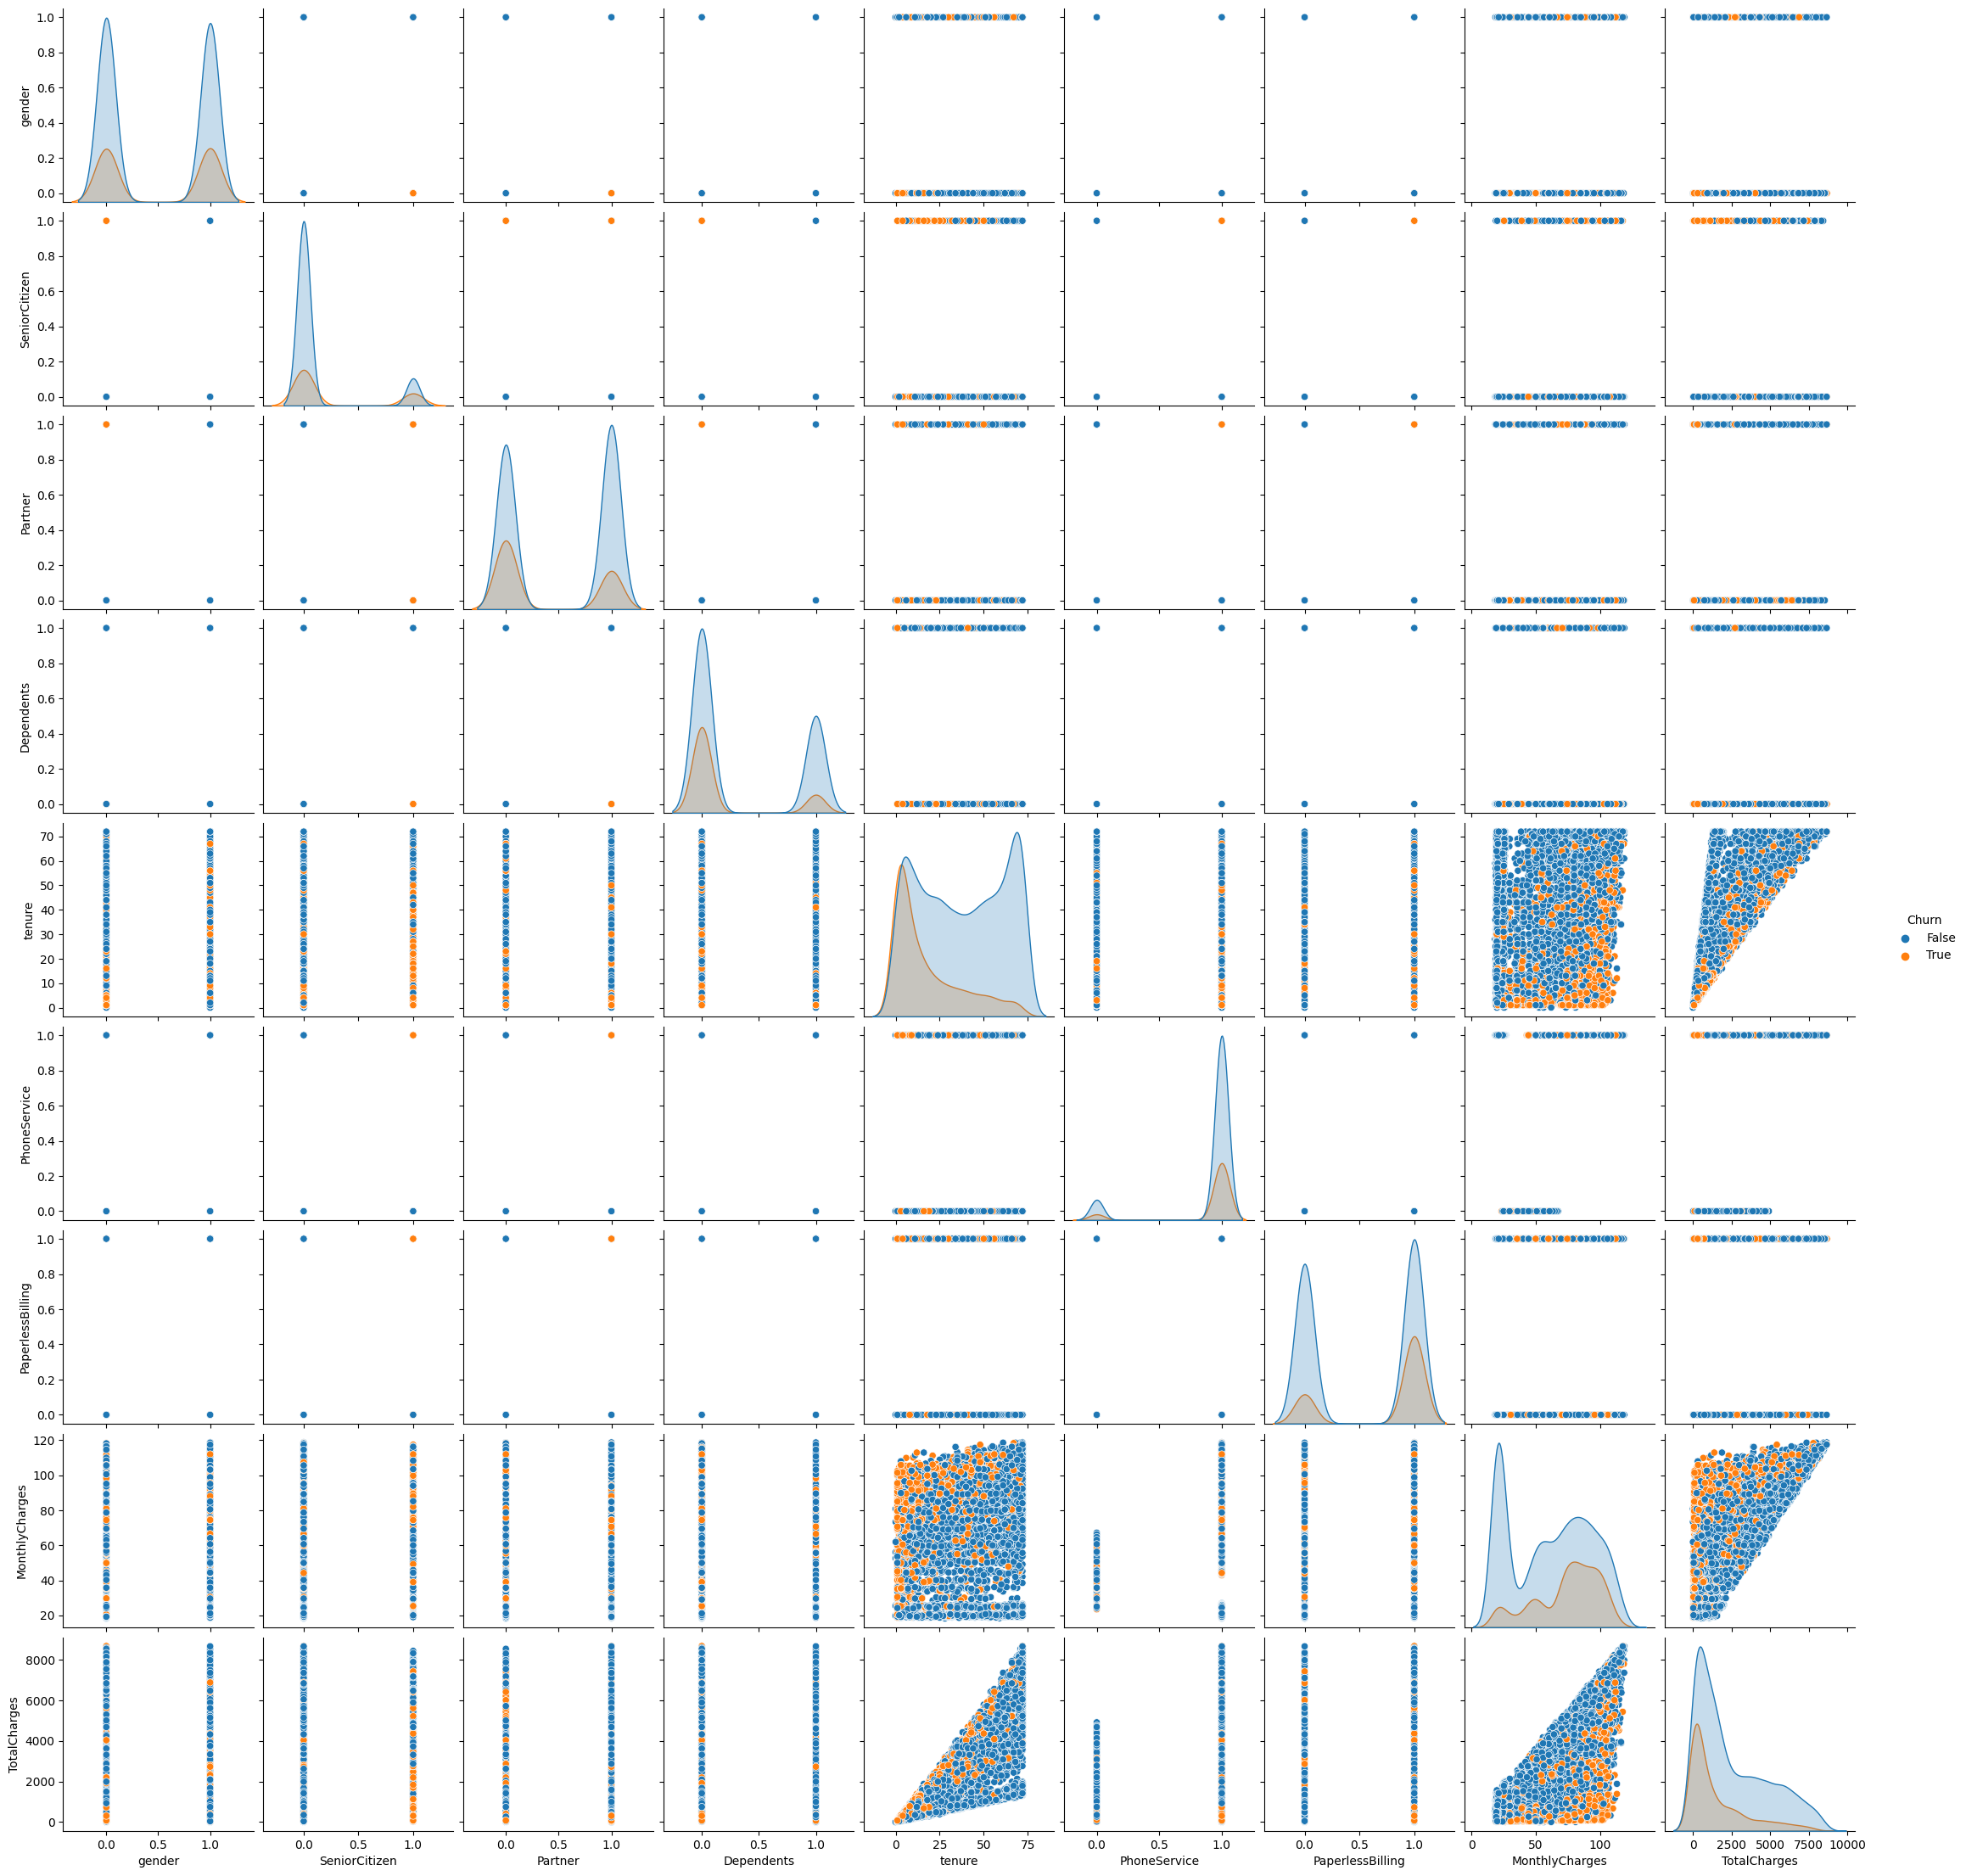

In [46]:
#visualize relationship between pair of all the features
sns.pairplot(data=df, hue='Churn')

#### Data Partition : Train Test Split

Before applying further Preparation Steps, we need to split the data into train and test sets. This will ensure that we do not prepare data based on the observations in test set. Thus, test set will be truly unseen data.
<br>
We will use X_train for modeling and X_test for evaluation of our model.

In [65]:
#Split train : test -> 75% : 25% 
X = df.drop(columns='Churn')
y = df.loc[:, 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True, stratify=df.Churn)
print("train", len(X_train), len(y_train), "\ntest ", len(X_test), len(y_test))

train 5282 5282 
test  1761 1761


####Categorical Features Encoding

##### Encoding Binary Variables
In python 1== True and 0 == False. Thus, binary variables are already in a form similar to the one-hot encoded.

In [66]:
X_train[bi_var]

,Partner,PaperlessBilling,Dependents,PhoneService,SeniorCitizen,gender
2308,True,True,True,True,False,False
4707,False,True,True,True,False,False
4866,False,True,False,True,False,True
1731,False,True,False,True,True,True
1846,False,False,False,True,False,False
...,...,...,...,...,...,...
4010,False,False,False,True,False,True
1565,False,True,False,True,False,True
4062,False,False,False,True,False,True
6511,True,True,True,True,False,True


##### OneHot Encoding for Nominal Categories



In [67]:
print("Initial Nominal Categories : ", len(mul_var))
print("Initial number of features : ", X_train.shape[1])
X_train = pd.get_dummies(X_train, columns=mul_var, drop_first=True)
#Also, encoding test set
X_test = pd.get_dummies(X_test, columns=mul_var, drop_first=True)

print("Encoded number of features : ", X_train.shape[1])
X_train.head(5)

Initial Nominal Categories :  10
Initial number of features :  19
Encoded number of features :  30


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,...,StreamingMovies_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
2308,False,False,True,True,71,True,True,104.65,7288.40,1,...,1,0,0,0,1,0,0,0,0,0
4707,False,False,False,True,49,True,True,109.20,5290.45,1,...,1,0,0,0,1,1,0,0,0,1
4866,True,False,False,False,16,True,True,63.05,1067.05,0,...,1,0,0,0,0,0,0,0,0,1
1731,True,True,False,False,1,True,True,69.60,69.60,1,...,0,0,0,0,0,0,1,0,0,0
1846,False,False,False,False,19,True,False,18.80,279.20,0,...,0,1,0,1,0,0,0,1,0,0


We can observe that we have 11 additional features (total 20) for existing 10 nominal categories. One-hot encoding increases the dimensionality of the data.

#### Scaling of numeric values
Most commonly used feature scaling techniques are normalization and standardization.

* Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. Suitable when data does not follow Gaussian distribution.

* Standardization is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

For this case, we are going to use Normalization as as data does not have normalized curve.

In [68]:
sc = MinMaxScaler()
X_train[ ['MonthlyCharges','tenure','TotalCharges'] ] = sc.fit_transform(X_train[['MonthlyCharges','tenure','TotalCharges']])

###Custom MixMaxScalar Function
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
def min_max_scaler_fn (dframe, columns):
  for col in columns :
    min_column = dframe[col].min()
    max_column = dframe[col].max()
    dframe
    [col] = (dframe[col] - min_column) / (max_column - min_column) 

#similary applying same processing on test data
X_test[ ['MonthlyCharges','tenure','TotalCharges'] ] = sc.transform(X_test[['MonthlyCharges','tenure','TotalCharges']])

####Resampling

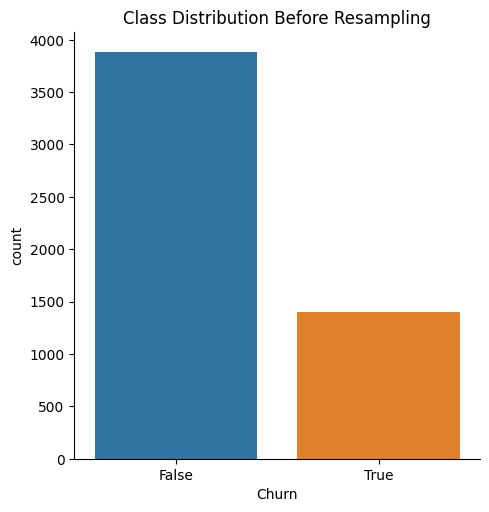

In [75]:
train_df = pd.concat([X_train, y_train], axis=1)
sns.catplot(data=train_df, kind='count',  order=[False, True], x='Churn')
plt.title('Class Distribution Before Resampling')
plt.show()

In [77]:
train_df.Churn.value_counts()     

False    3880
True     1402
Name: Churn, dtype: int64

We can see that there is imbalance in data wrt Churn variable.

yes_initial 1402
yes_upsample 3880


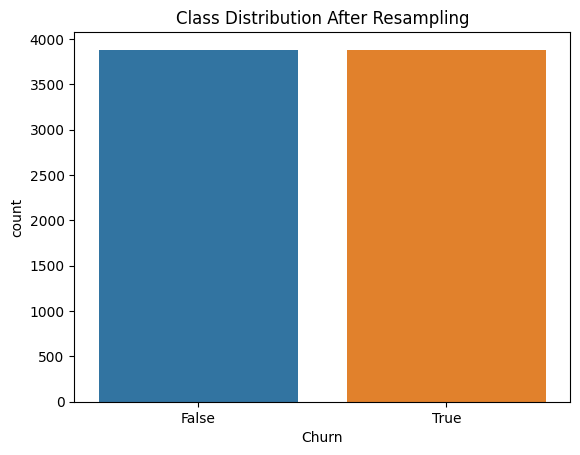

In [78]:
y_no = train_df[train_df.Churn == 0]
y_yes = train_df[train_df.Churn == 1]
y_yes_upsampled = y_yes.sample(n=len(y_no), replace=True, random_state=42)
print("yes_initial",len(y_yes))
print("yes_upsample",len(y_yes_upsampled))

y_train_sampled = y_no.append(y_yes_upsampled).reset_index(drop=True)
sns.countplot(x='Churn', data=y_train_sampled).set_title('Class Distribution After Resampling')
plt.show()


In [80]:
print("Intitial", train_df.shape)
print("Upsampled", y_train_sampled.shape)
train_df = y_train_sampled

Intitial (5282, 31)
Upsampled (7760, 31)


In [83]:
#Now split back to X_train and y_train
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']
X_train.shape, y_train.shape

((7760, 30), (7760,))

#### Feature Selection
Feature selection is the process of reducing the number of input variables by selecting those features that are important for prediction. This reduces the computational cost of the model and may also improve the model's performance.

###### 1. Unsupervised Selection (based on features, no target variable)
**Correlation** between the features : expresses the strength of the relationship between two variables. It can be used to remove redundant variables

Correlation is used in machine learning to identify multicollinearity, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, so it’s important to identify and remove predictors that are associated with high multicollinearity. 

<Axes: >

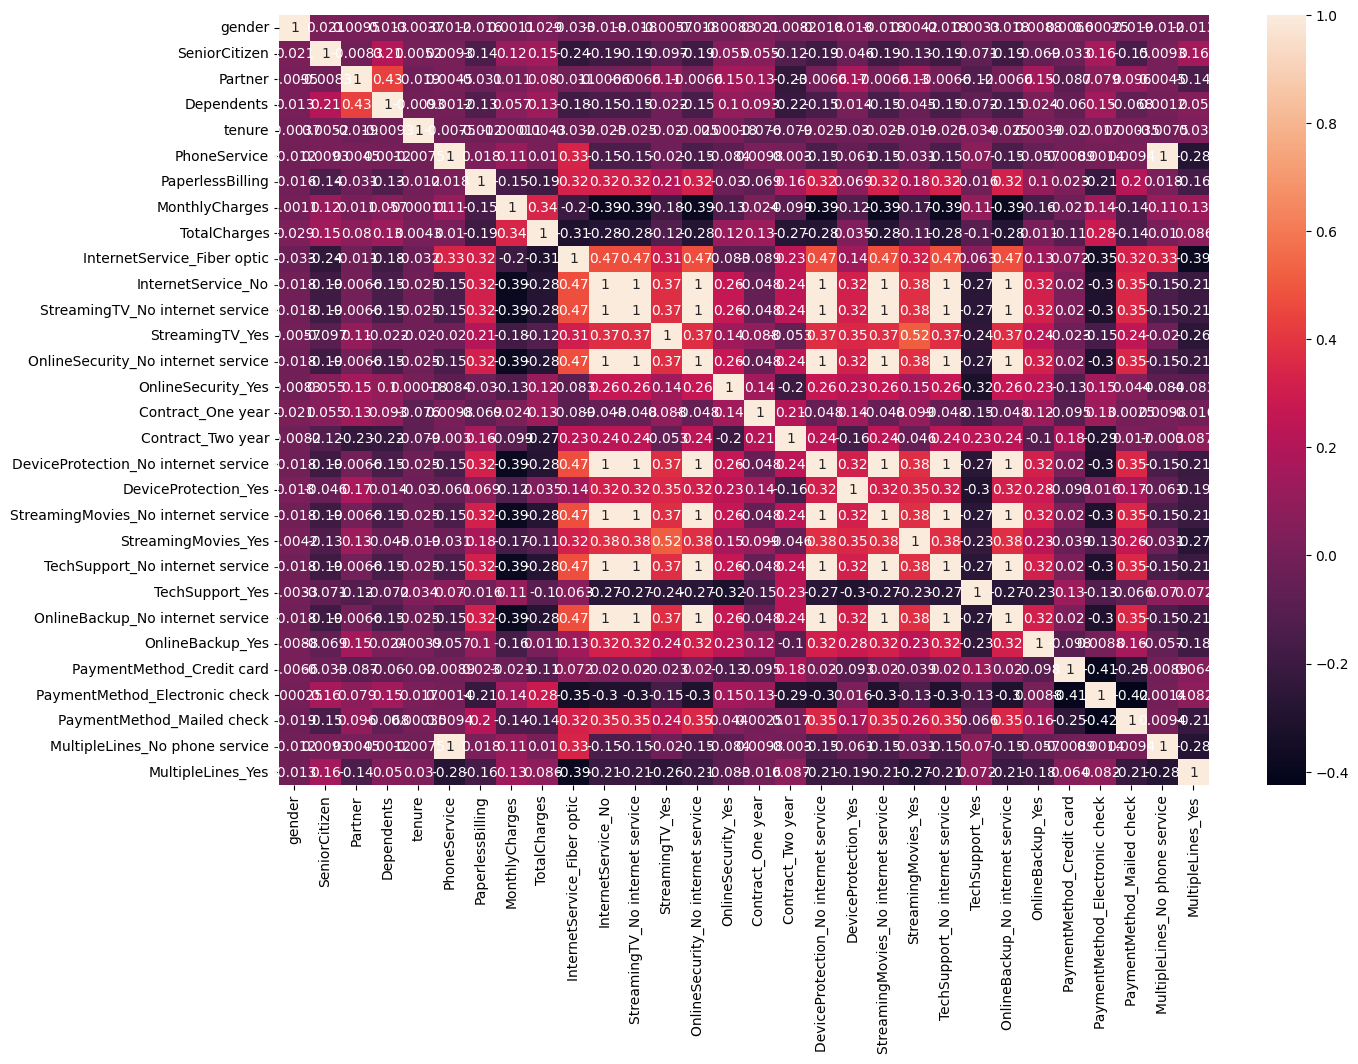

In [84]:
#Heatmap
# plt.figure(figsize=(12, 6))
# df_corr = X_train.apply(lambda x: pd.factorize(x)[0])
#ax = sns.heatmap(df_corr.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns, \
#                  linewidths=.2, cmap="YlGnBu")
plt.figure(figsize=(15, 10))
df_corr = X_train.apply(lambda x: pd.factorize(x)[0])
sns.heatmap(df_corr.corr(), annot=True)

From the above visualization, we can observe the following :  
1. We can observe that Phone Service and Multiple Line without Phone service are strong correlated. This is because those without Phone Service will not have multiple line with phone service. So we can drop Multiple Line without Phone service feature, as its information is already being captured with Phone Service.
2. Similarly, Internet_Service_No is strongly correlated with features related to Internet Services like Streaming_Movies_No_Internet, Online_Backup_No_internet, OnlineSecurity_No_Internet, TechSupport_No_Internet, Device_protection_no_internet, Streaming_TV_No_Internet. As those customers without Internet Services, will have no access to any of these features. Thus, we can drop these columns, as this information is already captured by Internet_Service_No variable.

3. Besides the above, none of the pair of features are strongly correlated.

In [85]:
correlated_features = ['MultipleLines_No phone service', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service' , 'OnlineSecurity_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service']
#X_train[correlated_features]
X_train.drop(correlated_features, axis=1, inplace=True)
X_test.drop(correlated_features, axis=1, inplace=True)
X_train.shape

(7760, 23)

###### 2. Filter based Feature Selection based on Stats 
For input category and output variable category, we have two methods - Mutual Info and Chi squares.

**Mutual Info score** calculates degree of dependency between feature (agnostic to type - category or numeric)and response variable. Higher the score, greater is the predictive power of feature in estimating the target.

In [88]:
cat_var = X_train.select_dtypes(include=['uint8','bool'])
print(cat_var.columns)

def calc_mutual_info(categorical_serie):
    return mutual_info_score(categorical_serie, y_train)

feature_imp = cat_var.apply(calc_mutual_info).sort_values(ascending=False)
print(feature_imp)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_Yes', 'OnlineSecurity_Yes', 'Contract_One year',
       'Contract_Two year', 'DeviceProtection_Yes', 'StreamingMovies_Yes',
       'TechSupport_Yes', 'OnlineBackup_Yes', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes'],
      dtype='object')
Contract_Two year                 0.088716
InternetService_Fiber optic       0.060984
PaymentMethod_Electronic check    0.058737
InternetService_No                0.040689
PaperlessBilling                  0.024334
Contract_One year                 0.021976
OnlineSecurity_Yes                0.018249
Dependents                        0.017872
TechSupport_Yes                   0.016471
PaymentMethod_Credit card         0.013914
Partner                           0.013389
SeniorCitizen                  

In [89]:
num_var = X_train.select_dtypes(include=['int','float'])
print(num_var.columns)
feature_imp = num_var.apply(calc_mutual_info).sort_values(ascending=False)
print(feature_imp)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
TotalCharges      0.658719
MonthlyCharges    0.274980
tenure            0.111890
dtype: float64


From above values, we can see that MultipleLines_Yes, PhoneService and gender have very low score, close to zero, thus they do not have strong relationship with the target. Therfore, they can be ignored.

**Chi-square Test** is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores

<Axes: >

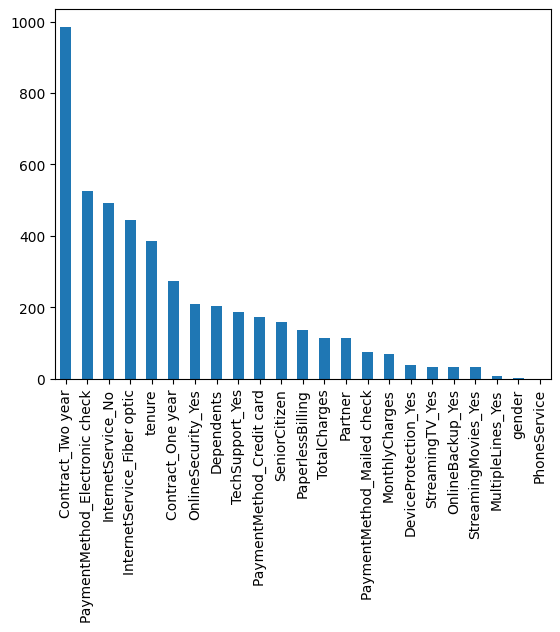

In [90]:
chi_scores = chi2(X_train,y_train)
chi_val, p_val = chi_scores
#chi_val, p_val 

chi_values = pd.Series(chi_val,index = X_train.columns)
chi_values.sort_values(ascending = False , inplace = True)
chi_values.plot.bar()

<Axes: >

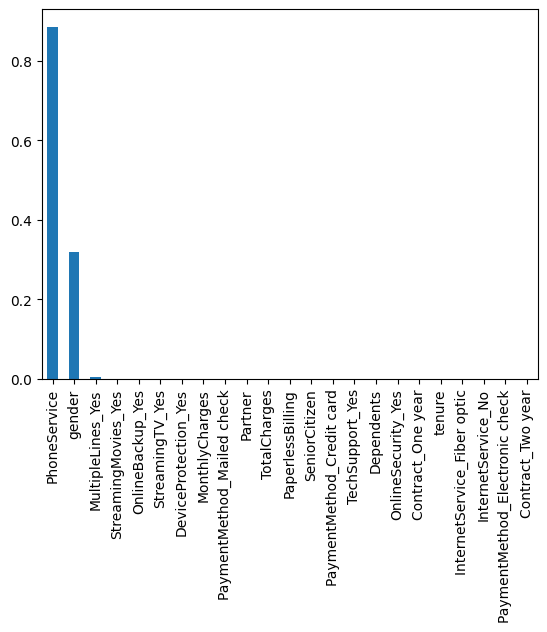

In [91]:
p_values = pd.Series(p_val,index = X_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

From the above visualization, we can say that gender and PhoneService have higher p-value and low chi-values, thus they are independent of response variable and can be ignored for modeling.

In [92]:
filter_features = ['gender', 'PhoneService']
X_train.drop(filter_features, axis=1, inplace=True)
X_test.drop(filter_features, axis=1, inplace=True)
X_train.shape

(7760, 21)

###### 3. Wrapper Method using RFE (Recursive  Feature Elimination)


In [93]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

rfe_rank = pd.Series(rfe.ranking_, index = X_train.columns)
rfe_rank.sort_values(ascending = True , inplace = True)
rfe_rank

Contract_Two year                  1
Contract_One year                  2
InternetService_No                 3
tenure                             4
TotalCharges                       5
MonthlyCharges                     6
StreamingTV_Yes                    7
InternetService_Fiber optic        8
PaymentMethod_Electronic check     9
StreamingMovies_Yes               10
MultipleLines_Yes                 11
PaperlessBilling                  12
SeniorCitizen                     13
TechSupport_Yes                   14
OnlineSecurity_Yes                15
Partner                           16
Dependents                        17
PaymentMethod_Mailed check        18
PaymentMethod_Credit card         19
OnlineBackup_Yes                  20
DeviceProtection_Yes              21
dtype: int64

Selected (i.e., estimated best) features are assigned rank 1. Thus, we can say that Total Charges, Fiber Optic Service, One Year Contract, Streaming Movies and No Internet Services have higher impact on the target variable.

In [94]:
#saving train test data
import pickle
filename = ['trainX.sav', 'trainY.sav', 'testX.sav', 'testY.sav']
pickle.dump(X_train, open(filename[0], 'wb'))
pickle.dump(y_train, open(filename[1], 'wb'))
pickle.dump(X_test, open(filename[2], 'wb'))
pickle.dump(y_test, open(filename[3], 'wb'))